In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [45]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
content = requests.get(url).content
data = pd.read_csv(io.StringIO(content.decode('utf-8')))
indiaData = data[data.location=='India']

In [46]:
indiaData.head()
indiaData.date = pd.to_datetime(indiaData.date, format='%Y-%m-%d')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Covid-2019 Status for India')

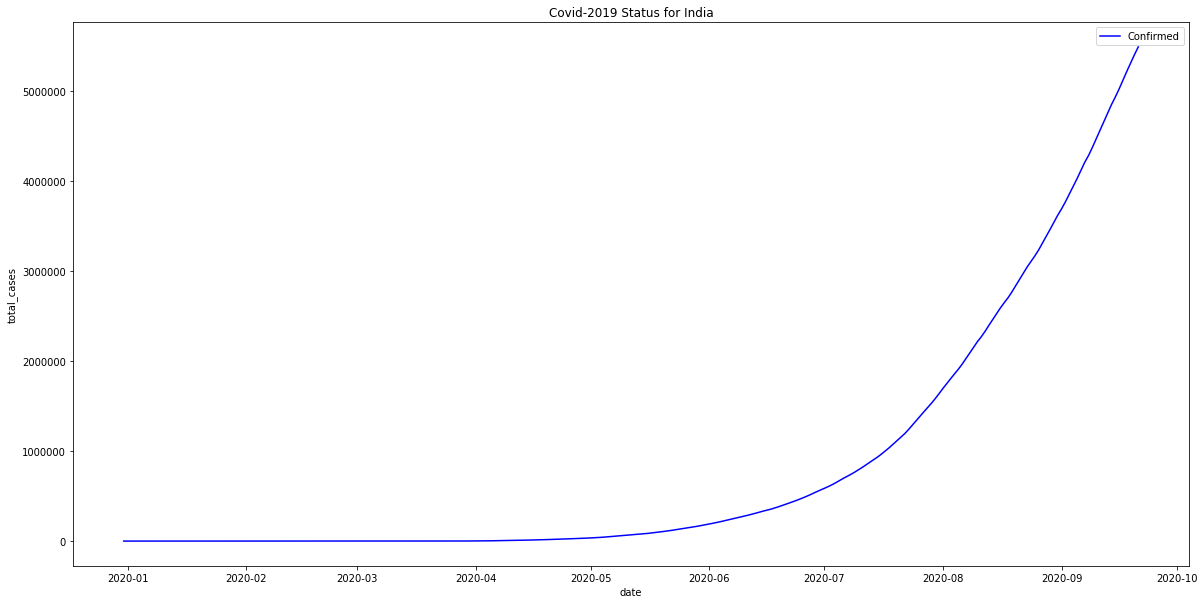

In [47]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='total_cases', data=indiaData, label='Confirmed', color='blue')
plt.title('Covid-2019 Status for India')

Text(0.5, 1.0, 'Covid-2019 New Cases per day for India')

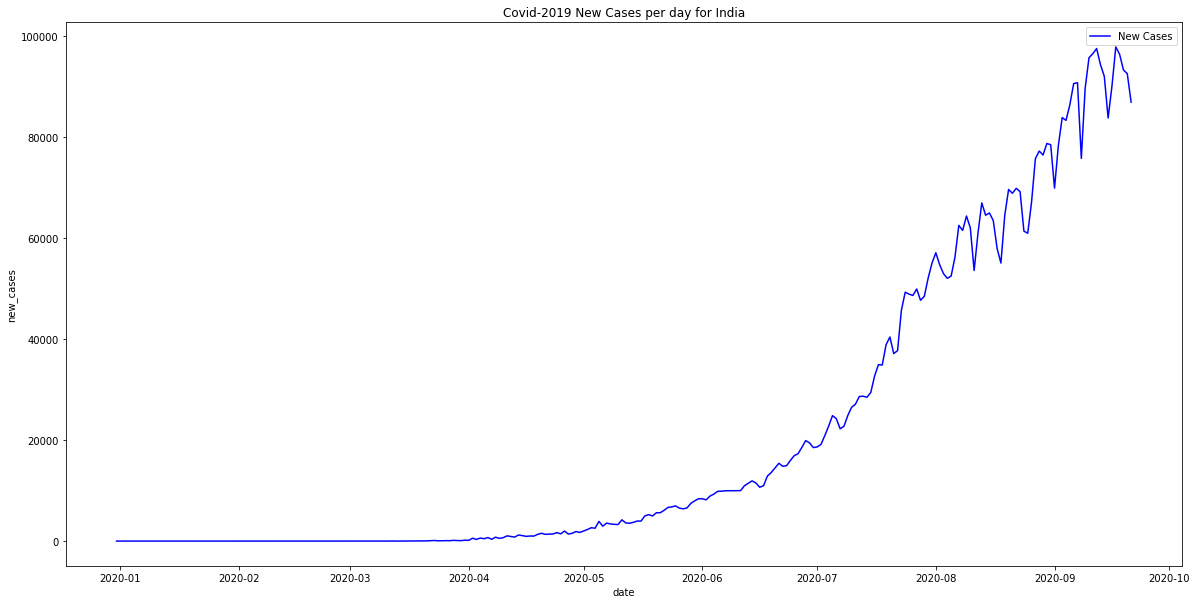

In [48]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='date', y='new_cases', data=indiaData, label='New Cases', color='blue')
plt.title('Covid-2019 New Cases per day for India')

In [49]:
dataForProphet = indiaData[['date','total_cases']].rename(columns={'date':'ds','total_cases':'y'}).sort_values(by='y', ascending=False).dropna()
# dataForProphet['cap'] = 1353000000
dataForProphet.head()

,ds,y
19531,2020-09-21,5487580.0
19530,2020-09-20,5400619.0
19529,2020-09-19,5308014.0
19528,2020-09-18,5214677.0
19527,2020-09-17,5118253.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


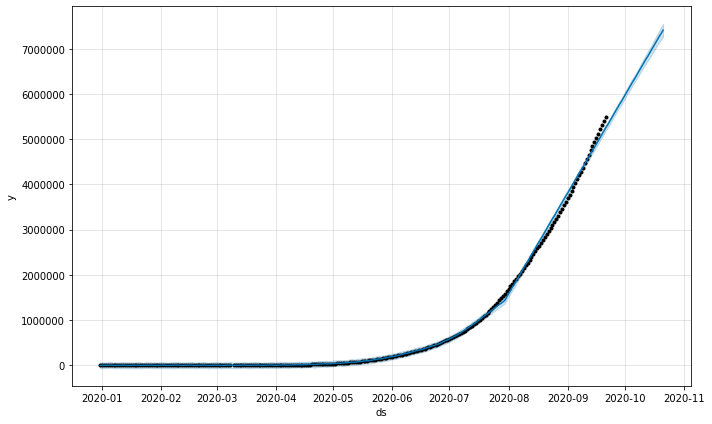

In [51]:
# Ideally Logistic growth should be used but it still looks like the inflection point has not been achieved yet
# Hence using linear growth which is default
m = Prophet()
m.fit(dataForProphet)
future = m.make_future_dataframe(periods=30)
# future['cap'] = 135300000
forecast = m.predict(future)
fig = m.plot(forecast)

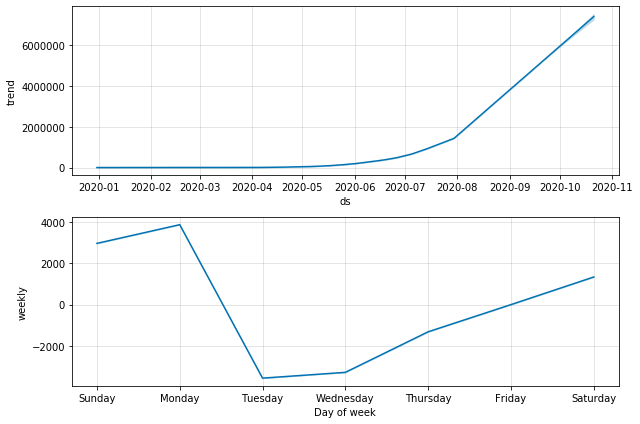

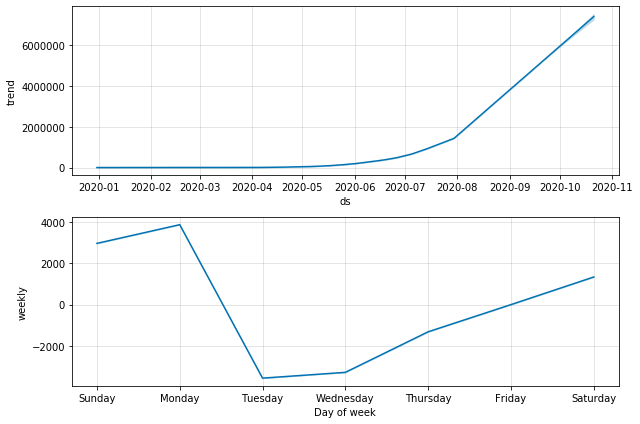

In [52]:
m.plot_components(forecast)

In [55]:
# Suppress scientific display
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

            ds          yhat    yhat_lower    yhat_upper
265 2020-09-22 5320631.40876 5255323.15409 5385600.89404
266 2020-09-23 5392992.70128 5324658.67093 5457504.33054
267 2020-09-24 5467043.90701 5398311.89578 5533988.18577
268 2020-09-25 5540445.02981 5476671.28482 5608066.58033
269 2020-09-26 5613867.51054 5544776.43049 5678453.95441
270 2020-09-27 5687581.20045 5617572.87221 5748860.63220
271 2020-09-28 5760570.71737 5692365.37144 5827983.63239
272 2020-09-29 5825195.53363 5752156.10337 5892154.51592
273 2020-09-30 5897556.82616 5827895.86889 5962788.95963
274 2020-10-01 5971608.03188 5905602.28190 6045276.33685
275 2020-10-02 6045009.15469 5978766.53436 6119154.82113
276 2020-10-03 6118431.63542 6044292.88980 6194041.96792
277 2020-10-04 6192145.32533 6112495.60870 6269211.77876
278 2020-10-05 6265134.84225 6188747.69343 6348005.04228
279 2020-10-06 6329759.65851 6250801.63829 6408384.88497
280 2020-10-07 6402120.95103 6322486.66149 6483856.84327
281 2020-10-08 6476172.15676 63